### Assignment 1: Implement a end to end Classification Model
Course: Machine Learning - Jan 2026
Submitted By: Kyal Sin Lin Lett
Student ID: 126112

I attest that the work done here is not plagiarized or copied entirely from others or Generative AI. 
The assignment is completed based on my own understanding, references to online documentations and guides 
on how a similar process is implemented. The reference will be linked and referred at relevant points 
in the code using comments.

### Question 1: The Baseline (Logistic Regression)
Task: Load the dataset and split it (80% Train, 20% Test). Train a standard LogisticRegression model.

Deliverable: Report the Accuracy and the Confusion Matrix.

Question: Look at the Confusion Matrix. How many "False Negatives" (Malignant cases missed) did the model make? Why is this number dangerous in a medical context?

In [2]:
## importing the necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [5]:
data = load_breast_cancer()
## more information about the dataset was found here:
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

## based on the documentation, i was able to identify the return dictionary keys

## exploring the data based on the returned keys
print(data.feature_names)
print(data.target_names)
print(data.data.shape)
print(data.target.shape)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
(569,)


In [7]:
## identifying the target encoding
print("Target values:", np.unique(data.target))
## this returns: Target values: [0 1]
## these are integers but they represent categories namely 'malignant' and 'benign'
## based on the target_names array from the documentation, we can map these integers to their respective categories
## https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
## 0 -> malignant
## 1 -> benign

Target values: [0 1]


In [10]:
## splitting the data
## using stratified sampling to maintain the proportion of classes in both training and testing sets
## to help with imbalanced datasets in terms of balancing the categories for malignant and benign 
## in both sets
## https://www.geeksforgeeks.org/machine-learning/stratified-sampling-in-machine-learning/

from sklearn.model_selection import train_test_split

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 455
Testing samples: 114


In [14]:
### Training a Logistic Regression model first as a baseline
from sklearn.linear_model import LogisticRegression

# max_iter increased because the default (100) may not converge
model_lr = LogisticRegression(max_iter=10000, random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

Accuracy: 0.9649

Confusion Matrix:
[[39  3]
 [ 1 71]]


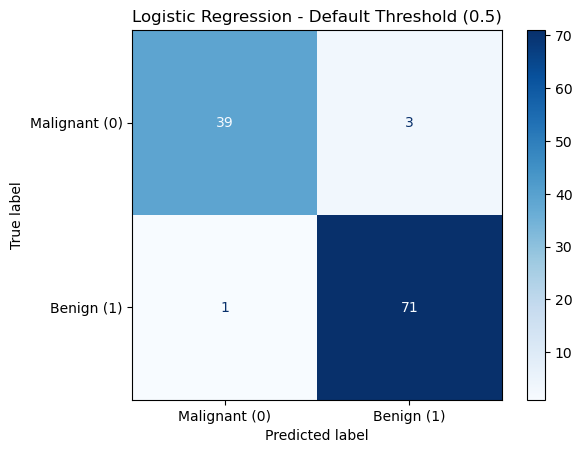

In [ ]:
## Evaluate with Accuracy and Confusion Matrix
### True Negatives (TN): Correctly predicted malignant (predicted 0, actual 0)
### False Positives (FP): Predicted malignant but actually benign (predicted 0, actual 1)
### False Negatives (FN): Predicted benign but actually malignant (predicted 1, actual 0) ← DANGEROUS
### True Positives (TP): Correctly predicted benign (predicted 1, actual 1)

## Matric is in the format:
## [[TP, FN],
##  [FP, TN]]

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['Malignant (0)', 'Benign (1)'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression - Default Threshold (0.5)')
plt.show()

The accuracy of about >96.5% looks good on paper butttt...

False Negatives are dangerous in this case: A False Negative means telling a cancer patient they're healthy. They go home, the cancer grows, and by the time it's caught again, it may be too late. This is a life-threatening error. 

### Question 2: The "Safety" Adjustment (Threshold Tuning)
Context: In medicine, we prefer a "False Alarm" (Biopsy a healthy person) over "Missing a Cancer".

Task: Instead of using the default .predict() (which uses a probability threshold of 0.5), use .predict_proba().

Action: Lower the threshold to 0.1 (i.e., if the model is even 10% sure it's cancer, predict "Malignant").

Deliverable: How did the Recall (Sensitivity) change? Did the number of False Negatives go down? What happened to the False Positives?

In [ ]:
#By default, .predict() uses a 0.5 probability threshold—if P(benign) > 0.5, predict benign
## looked at this: https://stackoverflow.com/questions/61184906/difference-between-predict-vs-predict-proba-in-scikit-learn
## to understand more about the difference between predict and predict_proba

# for example;
# predict() would output class 0 if the class probability for 0 is 0.6.
# [1.00000000e+00 3.41421562e-11] is the output of predict_proba that simply denotes 
# that the class probability for classes 0 and 1 are [1.0, 3.41421562e-11] respectively.

# Get probability predictions
y_proba = model_lr.predict_proba(X_test)

# predict_proba returns probabilities for BOTH classes
# Column 0 = P(malignant), Column 1 = P(benign)
print("Shape of probability output:", y_proba.shape)
print("P(Malignant)  P(Benign)")
print(y_proba[:5])

# Get probability of malignant (class 0)
prob_malignant = y_proba[:, 0]

# Adjusting the threshold to 0.1 to reduce false negatives
# This leads to the newer logic of ->  If P(malignant) < 0.1, predict benign (1), else predict malignant (0)
threshold = 0.1
y_pred_adjusted = (prob_malignant < threshold).astype(int)

Shape of probability output: (114, 2)
P(Malignant)  P(Benign)
[[1.00000000e+00 3.41421562e-11]
 [3.48483693e-05 9.99965152e-01]
 [9.49252195e-01 5.07478047e-02]
 [3.96058297e-01 6.03941703e-01]
 [9.99999998e-01 2.09377633e-09]]


In [21]:
from sklearn.metrics import recall_score, classification_report

# Original confusion matrix (threshold = 0.5)
cm_original = confusion_matrix(y_test, y_pred)

# New confusion matrix (threshold = 0.1)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

print("original >0.5 threshold")
print(cm_original)
print(f"\nFN (missed cancers): {cm_original[0, 1]}")

print("adjusted >0.1 threshold")
print(cm_adjusted)
print(f"\nFN (missed cancers): {cm_adjusted[0, 1]}")

original >0.5 threshold
[[39  3]
 [ 1 71]]

FN (missed cancers): 3
adjusted >0.1 threshold
[[42  0]
 [11 61]]

FN (missed cancers): 0


In [26]:
## Calculating Recall
## What is recall?  https://en.wikipedia.org/wiki/Precision_and_recall
## Recall answers the question: "Of all the actual positive cases, how many did we correctly catch?"

# Recall for malignant class (class 0)
# Recall = TP / (TP + FN) for that class
# For malignant: Recall = TN / (TN + FN) in our matrix notation

recall_original = recall_score(y_test, y_pred, pos_label=0)
recall_adjusted = recall_score(y_test, y_pred_adjusted, pos_label=0)

print(f"Recall for Malignant (original):  {recall_original:.4f}")
print(f"Recall for Malignant (adjusted):  {recall_adjusted:.4f}")

# Full classification report
print("\n=== Original Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

print("\n=== Adjusted Classification Report ===")
print(classification_report(y_test, y_pred_adjusted, target_names=['Malignant', 'Benign']))

## we can see that we achieved 100% recall for malignant cases with the adjusted threshold
## this means we did not miss any malignant cases (no false negatives)
## however, this comes at the cost of more false positives (benign cases predicted as malignant)
## which can lead to unnecessary stress but is generally more acceptable than missing a cancer diagnosis)
## moreover, overall accuracy did decrease but in medical diagnosis, recall (sensitivity) is often prioritized over accuracy
## https://medium.com/@venkatanaveen.avvaru/why-healthcare-ai-must-prioritize-recall-over-precision-fad1ec220d26

Recall for Malignant (original):  0.9286
Recall for Malignant (adjusted):  1.0000

=== Original Classification Report ===
              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        42
      Benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


=== Adjusted Classification Report ===
              precision    recall  f1-score   support

   Malignant       0.79      1.00      0.88        42
      Benign       1.00      0.85      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.91       114



### Question 3: Feature Selection (L1 Regularization)
Context: The dataset has 30 features (radius, texture, smoothness, etc.). A doctor wants to know: "Which 3 features are the most critical?"

Task: Train a Logistic Regression model with L1 Penalty (Lasso). Set the regularization strength C to a small number (e.g., 0.1 or 0.01) to force many weights to zero.

Deliverable: List the names of the features that still have non-zero weights. These are the "drivers" of the cancer prediction.

In [48]:
### Why this matters for doctors: With 30 features, it's hard to explain why the model made a decision. 
# If we can identify 3-5 key features, a doctor can verify: "Does this patient have abnormal values for these specific measurements?"

## logic behind L1 regularization (Lasso)
## L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients.
## This can lead to sparse models where some coefficients become exactly zero, effectively performing feature selection.
## This is particularly useful when we have a large number of features and we want to identify the most important ones.
## More details: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py

model_l1 = LogisticRegression(
    l1_ratio=1.0,        # 1.0 = pure L1 (Lasso)
    solver='saga',
    C=0.01, ## adjusting C to increase regularization strength as needed
    max_iter=10000,
    random_state=42
)

model_l1.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",1.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mult

In [49]:
# Get the coefficients
coefficients = model_l1.coef_[0]  # Shape is (1, 30), we want the (30,) array

# Create a DataFrame for easy viewing
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Filter to non-zero coefficients
non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]
non_zero_features = non_zero_features.sort_values('Abs_Coefficient', ascending=False)

print(f"Number of features with non-zero coefficients: {len(non_zero_features)}")
print("\n=== Important Features (Non-Zero Coefficients) ===")
print(non_zero_features)


Number of features with non-zero coefficients: 5

=== Important Features (Non-Zero Coefficients) ===
            Feature  Coefficient  Abs_Coefficient
2    mean perimeter     0.072211         0.072211
22  worst perimeter     0.060340         0.060340
23       worst area    -0.026147         0.026147
3         mean area     0.013812         0.013812
13       area error    -0.010317         0.010317


In [50]:
# reduce C which increases regularization strength to see how many features can be eliminated
for c_val in [0.1, 0.05, 0.01]:
    model_temp = LogisticRegression(l1_ratio=1.0, solver='saga', C=c_val, 
                                     max_iter=10000, random_state=42)
    model_temp.fit(X_train, y_train)
    n_features = np.sum(model_temp.coef_[0] != 0)
    print(f"C={c_val}: {n_features} non-zero features")

C=0.1: 9 non-zero features
C=0.05: 9 non-zero features
C=0.01: 5 non-zero features


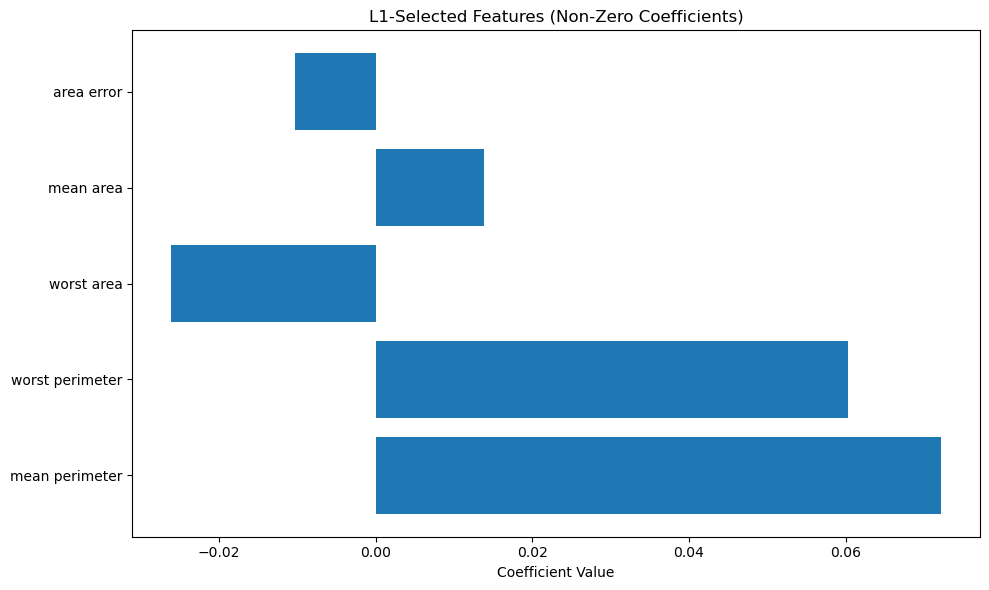

In [51]:
# Visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(non_zero_features['Feature'], non_zero_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('L1-Selected Features (Non-Zero Coefficients)')
plt.tight_layout()
plt.show()

### How to Interpret the Coefficients:
- Positive (right) Higher value → more likely benign (class 1)
- Negative (left) Higher value → more likely malignant (class 0)

### Observation
Top Drivers: 
Strongest indicators of BENIGN (positive coefficients):
- mean perimeter (+0.07) — largest effect
- worst perimeter (+0.06)
- mean area (small positive)

Strongest indicators of MALIGNANT (negative coefficients):
- worst area (-0.02)
- area error (-0.01)



### Question 4: SVM Comparison
Task: Train a Support Vector Machine (SVC) with a linear kernel.

Deliverable: Compare its accuracy to the Logistic Regression model. Does the "Max Margin" concept of SVM help here?

In [ ]:
## read this for reference on SVMs:
## https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7/
from sklearn.svm import SVC

# Linear kernel for fair comparison with Logistic Regression
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

Accuracy Comparison
Logistic Regression: 0.9649
Linear SVM:          0.9561


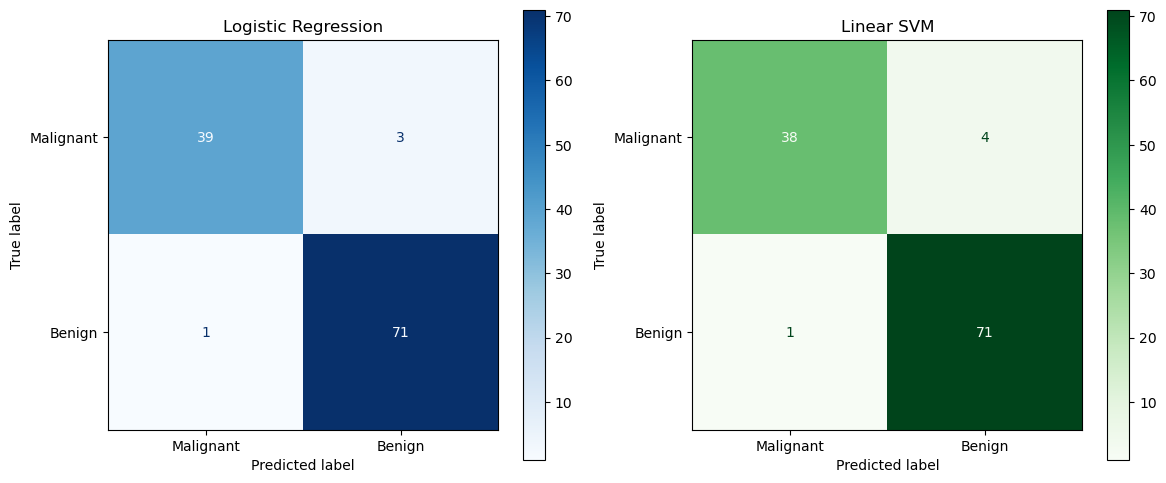

In [57]:
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy Comparison")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"Linear SVM:          {accuracy_svm:.4f}")

# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                       display_labels=['Malignant', 'Benign']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), 
                       display_labels=['Malignant', 'Benign']).plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Linear SVM')

plt.tight_layout()
plt.show()

In [58]:
print("Logistic Regression")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

print("\nLinear SVM")
print(classification_report(y_test, y_pred_svm, target_names=['Malignant', 'Benign']))

Logistic Regression
              precision    recall  f1-score   support

   Malignant       0.97      0.93      0.95        42
      Benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Linear SVM
              precision    recall  f1-score   support

   Malignant       0.97      0.90      0.94        42
      Benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Observation
Logistic Regression actually performed slightly better here. The Linear SVM missed 4 cancer cases compared to Logistic Regression's 3. 
In a medical context, that's one more patient sent home with undiagnosed cancer.

Why max margin doesnt really help in this case:
The breast cancer data is relatively clean and high-dimensional (30 features). Both Logistic Regression and SVM found similar decision boundaries because the classes were already fairly separable
there wasn't much ambiguity near the boundary where max margin would shine.

In this medical context:
Logistic Regression's benefit of probability outputs, makes it more suitable for medical applications where threshold tuning is critical.